## Trends In Song Lyrics Through The Decades ##
#### Kerwin Chen ####

### Introduction ###

In my project, I sought to understand how song lyrics have changed over the decades, from the 1960's to 2010's, and to identify characteristic terms in song lyrics from each decade. I found the key terms for each decade as follows:<br><br>
__Key terms for the 1960's:__ heartaches, longer, clown, went, kissed, untrue, arms, dear, shed, everyday<br>
__Key terms for the 1970's:__ sorrow, behind, warm, foolish, yes, woman, begun, lord<br>
__Key terms for the 1980's:__ romance, easier, shining, hearts, fantasy, jamming, must, stays, stronger, tease, lasts, heat<br>
__Key terms for the 1990's:__ scream, blame, step, speak, inside, silence, evening, loves, secret, confess, yo, vision, brothers<br>
__Key terms for the 2000's:__ thang, vibe, club, story, butterflies, divide, turns, kills, breathe, mmm, taken, wishing, waking<br>
__Key terms for the 2010's:__ beautiful, wasted, hate, shut, tryna, shit, missing, deserve, fuckin', already, fell, gon'<br>

### Data Description ###
__What are the observations (rows) and the attributes (columns)?__ <br>
Each row represents a single song from a given decade, and the attributes include the decade of the song, the year, the song name, artist naem, as well as its lyrics<br>
__What processes might have influenced what data was observed and recorded and what was not?__<br>
Because the creators of the data (Billboard) isn't involved with the music itself, I feel that it's able to maintain a pretty objective perspective because its ranking is based on a public function of music popularity and cumulative sales. <br>
__What preprocessing was done, and how did the data come to be in the form that you are using?__<br>
I obtained this dataset by first scraping for the top 100 songs of each year from Billboard Hot 100. Using this, I scraped for the lyrics for each of these songs and obtained the final dataset after a combination of manual inspection and cleaning of the lyrics and a few iterations of lyric scrapings.

### Preregistered Analysis ###
In phase III, I promised I would create a regression model to predict the decade of a song given lyrics, as well as characteristic terms for each decade.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import re
from collections import Counter
import lyricsgenius as lg
from patsy.builtins import Q
from nltk.corpus import stopwords
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MultiLabelBinarizer
import statsmodels.formula.api as smf

In [2]:
data = pd.read_csv("clean_lyrics.csv", index_col = 0)
data.head()

,decade,year,artist,song,lyrics
0,1960,1960,Jim Reeves,He’ll Have To Go,put your sweet lips a little closer to the pho...
1,1960,1960,Everly Brothers,Cathy’s Clown,don't want your love any more don't want your ...
2,1960,1960,Elvis Presley,It’s Now Or Never,it's now or never come hold me tight kiss me m...
3,1960,1960,Elvis Presley,Stuck On You,you can shake an apple off an apple tree shake...
4,1960,1960,Chubby Checker,The Twist,come on baby let's do the twist come on baby l...


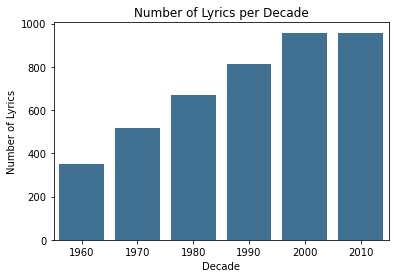

In [3]:
decade_group = data.groupby("decade")
decades = decade_group.groups.keys()
num_lyrics = sns.barplot(x = list(decades), y = decade_group.count()["lyrics"], color = (50/255, 116/255, 161/255))
num_lyrics.set(xlabel = "Decade", ylabel = "Number of Lyrics", title = "Number of Lyrics per Decade")
plt.show()

From the graph, I see that the preprocessing of the dataset left me with an uneven amount of lyrics across the decade, noteably less in older decades and more in modern decades. Moving forward, when looking at the prevalence of terms, I will report not raw frequencies, but percent frequency of terms amongst all the terms in a given decade.

In [4]:
#count_bydec is a dictionary with decades as keys and dictionary-like Counter objects of word counts for each decade as values
count_bydec = {}
for i in decades:
    count_bydec[i] = Counter(' '.join(decade_group.get_group(i).lyrics).split())

In [5]:
#sum_word_count is a dictionary with decades as keys and total word count for each decade as values
sum_word_count = {}
for i in count_bydec:
    sum_word_count[i] = sum(count_bydec[i].values())

In [6]:
for decade in sum_word_count:
    print(f'total word count for the {decade}\'s: {sum_word_count[decade]}')

total word count for the 1960's: 78981
total word count for the 1970's: 137722
total word count for the 1980's: 199077
total word count for the 1990's: 330925
total word count for the 2000's: 469149
total word count for the 2010's: 426594


As suspected, with the increase in number of songs across the decades, the more modern decades have more total words.

In [7]:
#lambda function to censor words
censor = lambda x: x[0] + "*" + x[2:]
def word_plotter(axis, keywords, should_censor):
    '''plots keywords on given axis, censoring legend as appropriate'''
    for keyword in keywords:
        axis.plot(decades, [count_bydec[decade][keyword] / sum_word_count[decade] * 100 for decade in count_bydec])
    axis.legend([censor(word) for word in keywords] if should_censor else keywords)

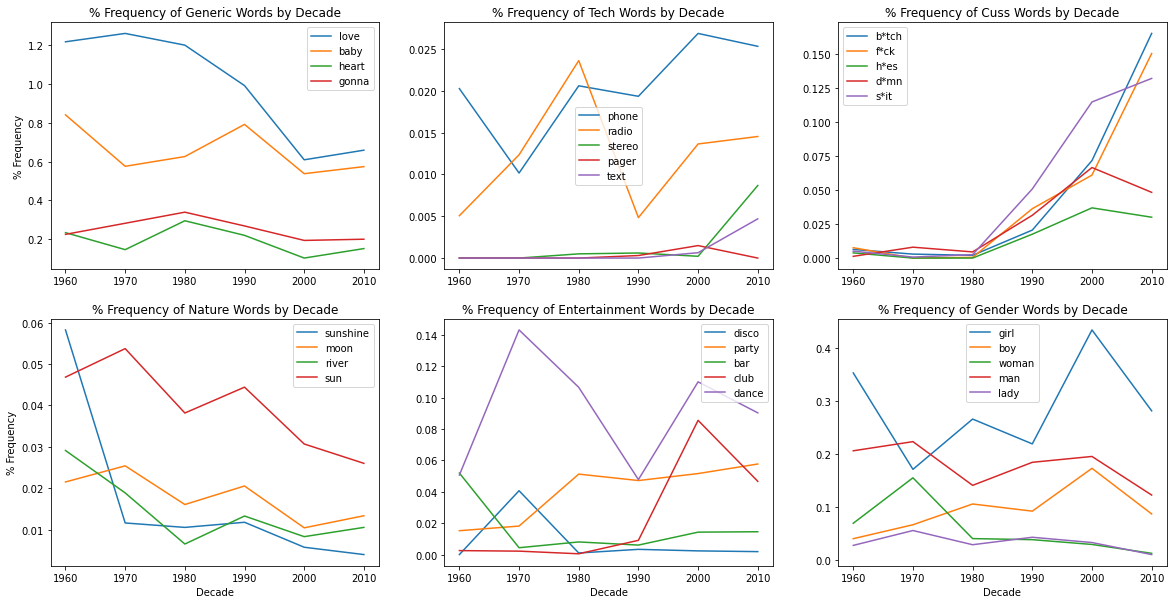

In [8]:
generic = ["love", "baby", "heart", "gonna"]
tech = ["phone", "radio", "stereo", "pager", "text"]
cuss = ["bitch","fuck", "hoes", "damn", "shit"]
nature = ["sunshine", "moon", "river", "sun"]
entertainment = ["disco", "party", "bar", "club", "dance"]
gender = ["girl", "boy", "woman", "man", "lady"]
keywords = [generic, tech, cuss, nature, entertainment, gender]
keyword_names = ["Generic", "Tech", "Cuss", "Nature", "Entertainment", "Gender"]
fig, axs = plt.subplots(2, 3, figsize = (20, 10))
wordlist = 0
#iteration through all the axis to plot each list of terms
for ax in axs:
    for subax in ax:
        word_plotter(subax, keywords[wordlist], True if keyword_names[wordlist] == "Cuss" else False)
        subax.set_title(f'% Frequency of {keyword_names[wordlist]} Words by Decade')
        wordlist += 1
        
axs[0, 0].set(ylabel = "% Frequency")
axs[1, 0].set(ylabel = "% Frequency")
axs[1, 0].set(xlabel = "Decade")
axs[1, 1].set(xlabel = "Decade")
axs[1, 2].set(xlabel = "Decade")
plt.show()

I selected a few words that I noticed from personal experience showed up in songs frequently, or represented a certain category of terms that I was interested in seeing the trends for across the decades. An interesting highlight is the percent frequency of cuss words by decade, as notice a general increase in percent frequency as we move to modern day. On the contrary, the percent frequency of nature words seem to decrease as we go across the decades, although not as rapidly in magnitude as cuss words. The rise of _disco_ in the 70's is reflected in song lyrics of that time as we can see a peak in the bottom center graph.

In [9]:
'''
scikit-learn's MultiLabelBinarizer conveniently allows me to create one-hot encoding from a list of lists (in my case,
a list of list of words from each song), which I use to create the dummy variable matrix to eventually feed into the
logistic regression.
'''
split_lyrics = [i.split() for i in data["lyrics"]]
mlb = MultiLabelBinarizer()
dummy = pd.DataFrame(mlb.fit_transform(split_lyrics))
dummy.columns = mlb.classes_

In [10]:
dummy.head()

,#1,#goals,$10,$100000,$20,$50,$50000,$7500,$hort,$ign,...,푸는,품격,하고픈게,하는건지,한잔의,해,허리,헉소리나게,화끈해야,﻿i
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


I noticed that some of the terms were not words, and some of the terms were words in a different language. To reduce the number of dummy variables, I did some processing before using it in my logistic regression.

In [11]:
#stop_words contains stop words, ie common words like 'the', from the nltk library
stop_words = stopwords.words("english")
#removal of terms with no latin characters from the dummy variable
dummy = dummy.loc[:, dummy.columns[dummy.columns.str.match(r'[a-z]')]]
#removal of terms with non-english characters, as well as words with '-' and '$'
#from inspection, '-' came from terms like "l-l-l-l-love" and "l-l-l-l-l-l-love" which appeared in very little songs
#from inspection, '$' came from terms like "a$ap", which appeared in very limited songs
dummy = dummy.loc[:, [i.isascii() and "-" not in i and "$" not in i for i in dummy.columns]]
#removal of stop words
dummy = dummy.loc[:, [i not in stop_words for i in dummy.columns]]

In [12]:
dummy

,a&r's,a',a'jd,a's,a'standing,a'thuggin,a/c,a1,a1a,a6's,...,zoovier,zoowap,zorunda,zsa,zu,zucchinis,zuckerberg,zuhause,zulema,zum
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4256,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4257,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4258,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4259,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
#fed the dummy varriables into my logistic regression as predictors, and decade as output
reg = LogisticRegression(max_iter = 1000)
model = reg.fit(dummy, data["decade"])

In [14]:
'''
my regression model coef_ attribute contains the coefficients for each dummy variable. In order to find the dummy terms 
with the largest coefficients for each decade (ie the presence of the term has the largest increase in probability that the
song is from a certain decade), I used numpy's argpartition() function, which will essentially sort the k-th element into its
final position, with larger terms after it, and smaller terms before, and return a list of indices. I chose to look at the
top 10 terms with the largest coefficients from each decade
'''
topwords = [np.argpartition(model.coef_[i], -15)[-15:] for i in range(len(model.coef_))]

In [15]:
decade = 1960
key_terms = []
for i in topwords:
    #extracts the top terms for each decade from the dummy variables given the index position from argspartition()
    print(f'Key terms for {decade}\'s: {[dummy.columns[j] for j in i]}')
    key_terms.append([dummy.columns[j] for j in i])
    decade += 10

Key terms for 1960's: ['whenever', 'heartaches', 'pretty', 'longer', "hangin'", 'clown', 'went', 'kissed', 'untrue', 'arms', 'dear', 'listen', 'ah', "she'd", 'everyday']
Key terms for 1970's: ['cup', 'sorrow', 'ah', 'wine', 'behind', 'warm', 'foolish', 'fancy', 'spend', 'yes', 'woman', 'begun', 'lord', 'instrumental', 'keeping']
Key terms for 1980's: ['gives', 'romance', 'easier', 'shining', 'hearts', 'fantasy', 'jamming', 'tonight', 'brighter', 'must', 'stays', 'stronger', 'tease', 'lasts', 'heat']
Key terms for 1990's: ['scream', 'blame', 'step', 'boyfriend', 'speak', 'inside', 'silence', 'hat', 'evening', 'loves', 'secret', 'confess', 'yo', 'vision', 'brothers']
Key terms for 2000's: ['thang', 'vibe', 'oooh', 'club', 'story', 'butterflies', 'divide', 'turns', 'kills', 'breathe', 'mmm', 'taken', 'wishing', 'waking', 'cried']
Key terms for 2010's: ['anywhere', 'beautiful', 'hiding', 'wasted', 'hate', 'shut', 'tryna', 'shit', 'missing', 'deserve', "fuckin'", 'already', 'fell', "gon'", 

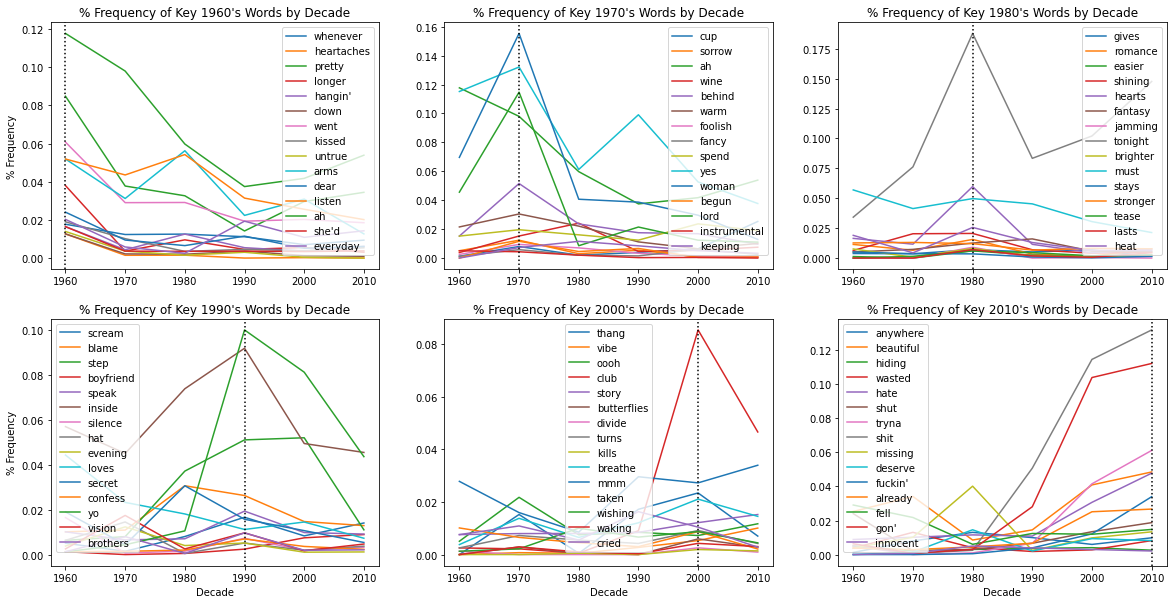

In [16]:
fig, axs = plt.subplots(2, 3, figsize = (20, 10))
wordlist = 0
#iteration through all the axis to plot each list of terms
for ax in axs:
    for subax in ax:
        word_plotter(subax, key_terms[wordlist], False)
        subax.axvline(x = list(decades)[wordlist], color = "black", ls = "dotted")
        subax.set_title(f'% Frequency of Key {list(decades)[wordlist]}\'s Words by Decade')
        wordlist += 1

axs[0, 0].set(ylabel = "% Frequency")
axs[1, 0].set(ylabel = "% Frequency")
axs[1, 0].set(xlabel = "Decade")
axs[1, 1].set(xlabel = "Decade")
axs[1, 2].set(xlabel = "Decade")
plt.show()

In general, I see a peak for each of the terms during the decade that I got them from. However, this is not true for every term, which makes me suspect that not all of these terms are statistically significant.

In [17]:
def predict(lyrics):
    '''
    this function takes in the lyrics for a song, and returns the predicted decade based on the regression model
    '''
    lyrics = re.sub(r'(\[.*?\]|\,|\.|\!|\?|\"|\(|\)|\{|\})', '', lyrics).lower()
    lyrics = re.sub(r'\n', ' ', lyrics).strip()
    split_lyrics = "".join(lyrics).split() 
    lyrics_dat = [1 if i in split_lyrics else 0 for i in dummy.columns]
    df = pd.DataFrame(lyrics_dat).T
    df.columns = dummy.columns
    return f'The model predicts that this song is from the {model.predict(df)[0]}\'s.'

In [18]:
def predict_v2(song, artist):
    '''
    this function takes in the song name and artist name, and obtains the lyrics using the lyricsgenius package and calls
    on the other predict function to return the predicted decade based on the regression model.
    '''
    genius = lg.Genius("JAlCQvWQxOy0Ertp8NhDj4wHzxBwc12vQiToA2HkRFqDHCLOBYTj0DjgrZCldg0f", sleep_time=0.01, verbose = False)
    try:
        locate_song = genius.search_song(song, artist)
        print(f'first 100 characters of lyrics for {song} by {artist} from Genius: \n{locate_song.lyrics[:100]}...\n')
        print(predict(locate_song.lyrics))
    except:
        print(f"Lyrics for {song} by {artist} not found.")

In [19]:
#extracting the key term dummy variables from all the dummies
key_dum = dummy.loc[:, [term for each_decade in key_terms for term in each_decade]]
#concatenating the key term dummy variables to the main dataframe
key_data = pd.concat([data, key_dum], axis = 1)
#creating dummy for decades
decade_dummy = pd.get_dummies(key_data["decade"])
#concatenating the key_data and the decade dummy variables
key_data = pd.concat([key_data, decade_dummy], axis = 1)

In [20]:
#col_string = ' + '.join(["Q(\"" + i + "\")" for i in list(key_dum.columns)])

In [21]:
#string_1960 = ' + '.join(["Q(\"" + i + "\")" for i in key_terms[0]])

In [22]:
'''
this loop will loop through the key terms for each decade, and use the statsmodel library to determine the pvalue for 
each of the key terms, and place them into signif_decade_terms if the term is significant (pval < 0.05)
'''
signif_decade_terms = []
for i in range(len(list(decades))):
    #the Patsy library's Q() allows variable name to be taken literally (eg apostrophes won't be problematic)
    decade_terms_string = ' + '.join(["Q(\"" + i + "\")" for i in key_terms[i]])
    formula = f"Q({str(list(decades)[i])}) ~ " + decade_terms_string
    model_dat = smf.logit(formula = formula, data = key_data).fit(maxiter = 10000)
    #model_dat.summary()
    #dir(model_dat)
    p = pd.DataFrame(model_dat.pvalues).reset_index()
    p.columns = ["term", "pval"]
    terms = p.loc[p.pval < 0.05].term[1:]
    signif_decade_terms.append([re.sub(r'(Q\(\")|(\"\))', '', i) for i in terms])

Optimization terminated successfully.
         Current function value: 0.274827
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.358484
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.422483
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.468907
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.497572
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.485715
         Iterations 6


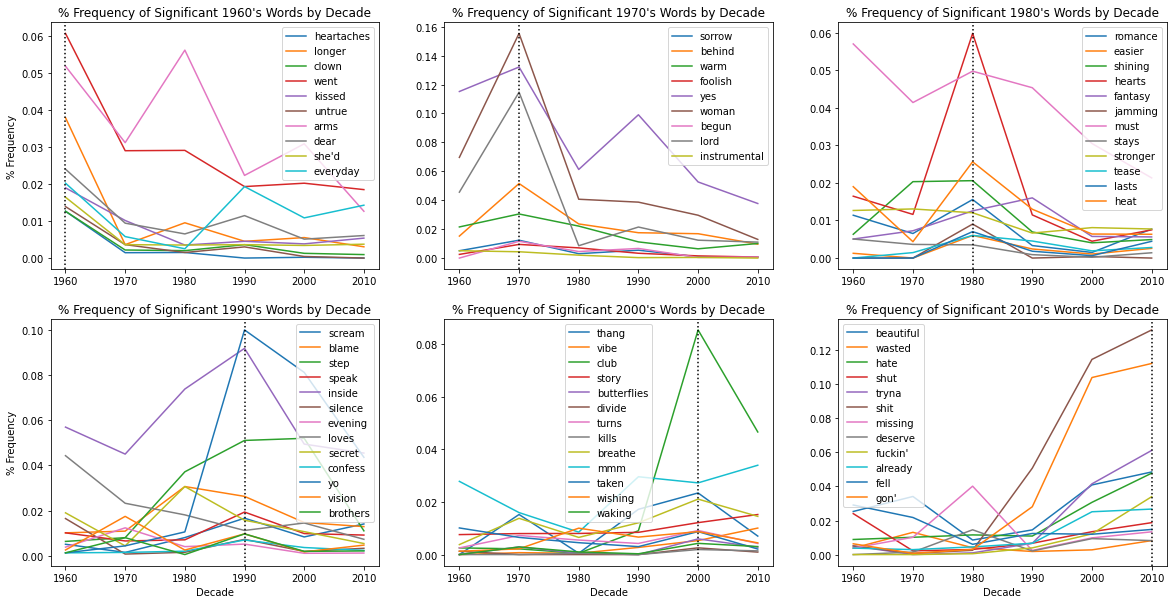

In [26]:
#plotting significant terms
fig, axs = plt.subplots(2, 3, figsize = (20, 10))
wordlist = 0
for ax in axs:
    for subax in ax:
        word_plotter(subax, signif_decade_terms[wordlist], False)
        subax.axvline(x = list(decades)[wordlist], color = "black", ls = "dotted")
        subax.set_title(f'% Frequency of Significant {list(decades)[wordlist]}\'s Words by Decade')
        wordlist += 1

axs[0, 0].set(ylabel = "% Frequency")
axs[1, 0].set(ylabel = "% Frequency")
axs[1, 0].set(xlabel = "Decade")
axs[1, 1].set(xlabel = "Decade")
axs[1, 2].set(xlabel = "Decade")
plt.show()

These graphs show the percent frequency of the significant terms (pval < 0.05) for each decade. Along with the p-value, we see that the majority of these terms peak during the decade that I got them from.

### Limitations ###
One big limitation is the size of my data. As shown in the first bargraph, I had less than 400 songs from the 1960s, while about 1000 songs for the 2000s and 2010s, which isn't much either. I started with 1000 titles for each decade, but during the data cleaning, the number of viable songs were gradually whittled down as I eliminated songs without lyrics/songs with incorrect lyrics, erring on the side of more. Another limitation was that I wasn't able to find the p value for all of the predictors due to having not enough memory on my computer, so instead of being able to find all of the significant terms, I focused on finding the significant terms in 15 terms per decade with the largest coefficient. Lastly, there may have been some incorrect lyrics still left in my dataset. I also could have done more manual inspection that may have allowed me to keep more of the correct lyrics when cleaning.

### Acknowledgements ###
Throughout the project, the documentation for each of the libraries and modules I used (especially patsy and sklearn.preprocessing), as well as the Stack Overflow pages that lead me to them, were beneficial in helping me to complete this project

### Source Code ###

[Github Repo](url)

### Appendix ###
[Data Cleaning](url)

### Questions for Reviewers ###
1. For each decade, does it make more sense to look at terms with the smallest coefficients from the logistic regression and check the p values, or should I look at the terms with the highest coefficient from other decades and check the p values? (I tried finding the p-value for just all the terms, but my computer couldn't handle it.) 
2. On a similiar note, sometimes I get errors saying "Maximum Likelihood optimization failed to converge." What does this mean?
3. I'm not sure what to write for interpretations and conclusions, because I feel like my questions were more just broad analysis, would appreciate some pointers here.
4. How many terms (or significant terms) should I be looking at/graph for each decade?
5. Should i even graph the key words before finding their significance because im be graphing the significant ones later anyways?
6. For the data cleaning in the appendix, so my data scraping/cleaning is spread across multiple notebooks and and I can't rerun them in a single notebook because it takes a long time to run. Right now in my appendix I have a notebook linking to the different notebooks, can I leave it like that or should I copy all the cells into a new notebook (which would not be not executed)?
7. Anything I should change/add?